# 1. Import Library

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

# 數據預處理

In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [4]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [6]:
y_TrainOne_Hot = np_utils.to_categorical(y_Train)
y_TestOne_Hot = np_utils.to_categorical(y_Test)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(128, activation='relu'))

In [16]:
model.add(Dropout(0.5))

In [17]:
model.add(Dense(10,activation='softmax'))

In [18]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

# 訓練模型

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [20]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOne_Hot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Epoch 1/20
160/160 - 87s - loss: 0.5048 - accuracy: 0.8385 - val_loss: 0.1083 - val_accuracy: 0.9667 - 87s/epoch - 547ms/step
Epoch 2/20
160/160 - 80s - loss: 0.1453 - accuracy: 0.9556 - val_loss: 0.0689 - val_accuracy: 0.9793 - 80s/epoch - 500ms/step
Epoch 3/20
160/160 - 79s - loss: 0.1020 - accuracy: 0.9694 - val_loss: 0.0553 - val_accuracy: 0.9834 - 79s/epoch - 492ms/step
Epoch 4/20
160/160 - 73s - loss: 0.0839 - accuracy: 0.9754 - val_loss: 0.0458 - val_accuracy: 0.9864 - 73s/epoch - 457ms/step
Epoch 5/20
160/160 - 73s - loss: 0.0697 - accuracy: 0.9793 - val_loss: 0.0427 - val_accuracy: 0.9875 - 73s/epoch - 455ms/step
Epoch 6/20
160/160 - 73s - loss: 0.0611 - accuracy: 0.9812 - val_loss: 0.0419 - val_accuracy: 0.9877 - 73s/epoch - 456ms/step
Epoch 7/20
160/160 - 71s - loss: 0.0549 - accuracy: 0.9830 - val_loss: 0.0357 - val_accuracy: 0.9893 - 71s/epoch - 445ms/step
Epoch 8/20
160/160 - 71s - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0361 - val_accuracy: 0.9898 - 71s/epoch - 446

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

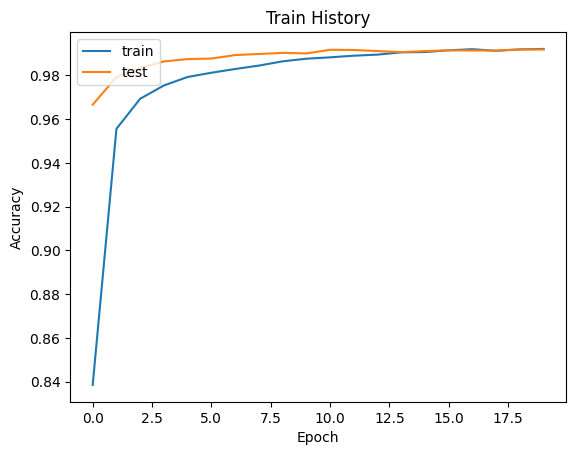

In [23]:
show_train_history('accuracy','val_accuracy')

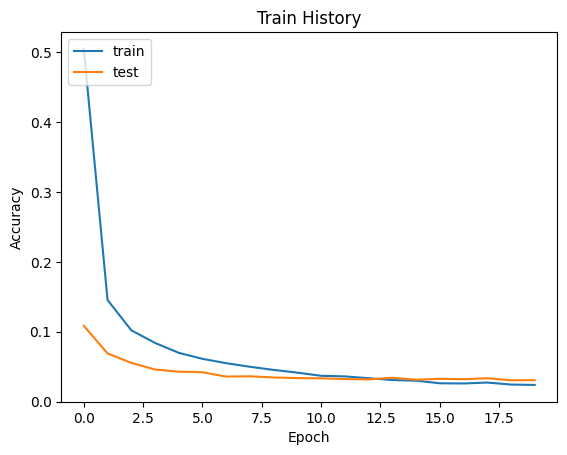

In [24]:
show_train_history('loss','val_loss')

# 評估模型的準確率

In [25]:
scores = model.evaluate(x_Test4D_normalize , y_TestOne_Hot)
scores[1]

313/313 [==============================] - 5s 16ms/step - loss: 0.0228 - accuracy: 0.9922


0.9922000169754028

# 預測結果

In [30]:
prediction=np.argmax(model.predict(x_Test4D_normalize),axis=1)

313/313 [==============================] - 7s 22ms/step


In [31]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 查看預測結果

In [32]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

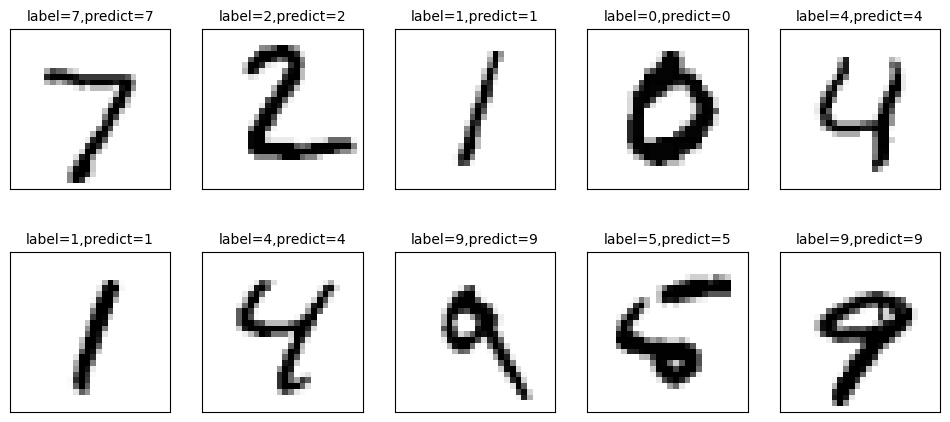

In [33]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [34]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,1,0,0,0,0,4,1,0,0
1,0,1129,1,1,0,1,0,2,1,0
2,1,0,1028,0,0,0,0,3,0,0
3,0,0,1,1006,0,2,0,0,0,1
4,0,0,0,0,975,0,1,0,0,6
5,0,0,0,3,0,888,1,0,0,0
6,2,2,0,0,1,2,951,0,0,0
7,0,1,1,2,0,0,0,1022,1,1
8,2,0,3,2,0,3,0,2,961,1


In [35]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [36]:
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2597,5,3
5937,5,3
